In [1]:
import numpy as np

import sys
sys.path.append('../../..')
from utils.tools import get_metrics
import matplotlib.pyplot as plt
%matplotlib inline


## Evaluation loss and accuracy for default initialization

with weight decay=0 and default initialization

In [59]:
log_files = np.zeros(30)
loss_avg = np.zeros(10)
loss_err = np.zeros(10)
lr = np.zeros(10)

acc = np.zeros(30)
acc_avg = np.zeros(10)
acc_err = np.zeros(10)



i = 0
j = 0

for lr_power in ['6', '5', '4', '3', '2']:

    for lr_no in ['1', '5']:
        
        for no in ['1', '2', '3']:
            log_file = '../train_lr_{}e-{}_{}.log'.format(lr_no, lr_power, no)
            conf, train_dict, eval_dict = get_metrics(log_file)
            log_files[i] = np.array(eval_dict['Loss'])
            acc[i] = np.array(eval_dict['Acc'])
            i += 1
            
        loss_avg[j] = np.mean(log_files[i-3:i])
        loss_err[j] = np.std(log_files[i-3:i])
        lr[j] = float('{}e-{}'.format(lr_no, lr_power))
        acc_avg[j] = np.mean(acc[i-3:i])
        acc_err[j] = np.std(acc[i-3:i])
        

        j += 1
        
print(lr)
            

[1.e-06 5.e-06 1.e-05 5.e-05 1.e-04 5.e-04 1.e-03 5.e-03 1.e-02 5.e-02]


In [55]:
loss_avg *= 100
loss_err *= 100
acc_avg *= 100
acc_err *= 100

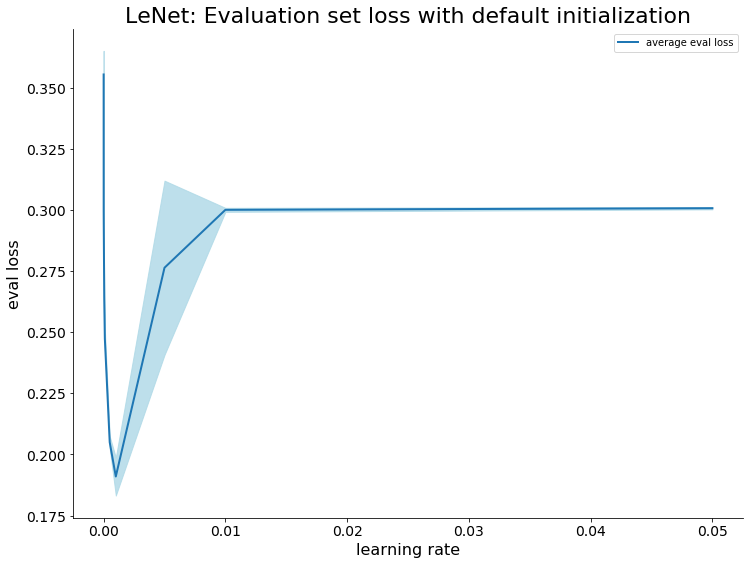

In [62]:
plt.figure(figsize=(12, 9))
 
ax = plt.subplot(111)

# Remove frame lines of the plot
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
 
# show the axis ticks only on the bottom and on the left of the axis
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# make the axis big enough
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
 
plt.ylabel("eval loss", fontsize=16)
plt.xlabel("learning rate", fontsize=16)

 
# plt error bars
plt.fill_between(lr, loss_avg - loss_err,
                loss_avg + loss_err, color="lightblue",alpha=0.8)
 
plt.plot(lr, loss_avg, lw=2, label="average eval loss")

plt.legend(loc='best')
 
plt.title("LeNet: Evaluation set loss with default initialization", fontsize=22)
 
plt.savefig("lenet_eval_loss_default_init_wd_0", bbox_inches="tight")

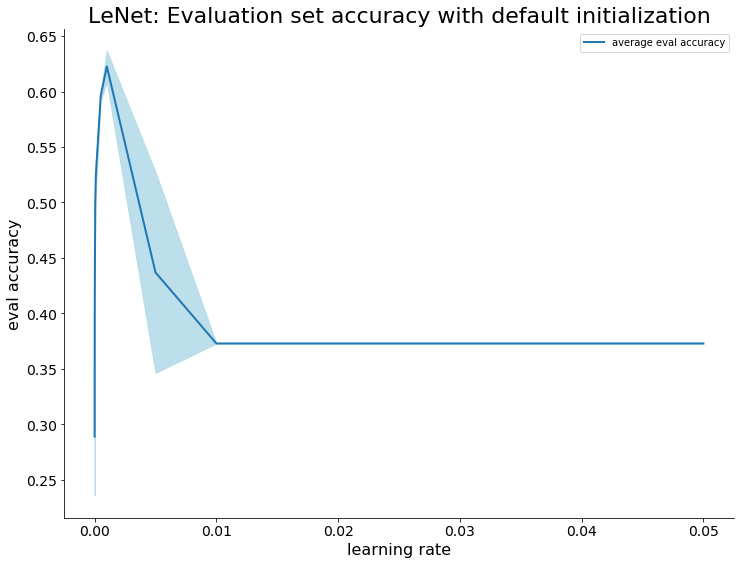

In [63]:
plt.figure(figsize=(12, 9))
 
ax = plt.subplot(111)

# Remove frame lines of the plot
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
 
# show the axis ticks only on the bottom and on the left of the axis
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# make the axis big enough
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
 
plt.ylabel("eval accuracy", fontsize=16)
plt.xlabel("learning rate", fontsize=16)

 
# plt error bars
plt.fill_between(lr, acc_avg - acc_err,
                acc_avg + acc_err, color="lightblue",alpha=0.8)
 
plt.plot(lr, acc_avg, lw=2, label="average eval accuracy")

plt.legend(loc='best')
 
plt.title("LeNet: Evaluation set accuracy with default initialization", fontsize=22)
 
plt.savefig("lenet_eval_acc_default_init_wd_0", bbox_inches="tight")

## Evaluation loss and accuracy with Kaiming He initialization

weight decay=0

In [64]:
kai_log_files = np.zeros(12)
kai_loss_avg = np.zeros(4)
kai_loss_err = np.zeros(4)
kai_lr = np.zeros(4)

kai_acc = np.zeros(12)
kai_acc_avg = np.zeros(4)
kai_acc_err = np.zeros(4)



i = 0
j = 0

for lr_power in ['4', '3']:

    for lr_no in ['1', '5']:
        
        for no in ['1', '2', '3']:
            log_file = '../train_lr_{}e-{}_kaiming_he_{}.log'.format(lr_no, lr_power, no)
            conf, train_dict, eval_dict = get_metrics(log_file)
            kai_log_files[i] = np.array(eval_dict['Loss'])
            kai_acc[i] = np.array(eval_dict['Acc'])
            i += 1
            
        kai_loss_avg[j] = np.mean(kai_log_files[i-3:i])
        kai_loss_err[j] = np.std(kai_log_files[i-3:i])
        kai_lr[j] = float('{}e-{}'.format(lr_no, lr_power))
        kai_acc_avg[j] = np.mean(kai_acc[i-3:i])
        kai_acc_err[j] = np.std(kai_acc[i-3:i])
        

        j += 1
            

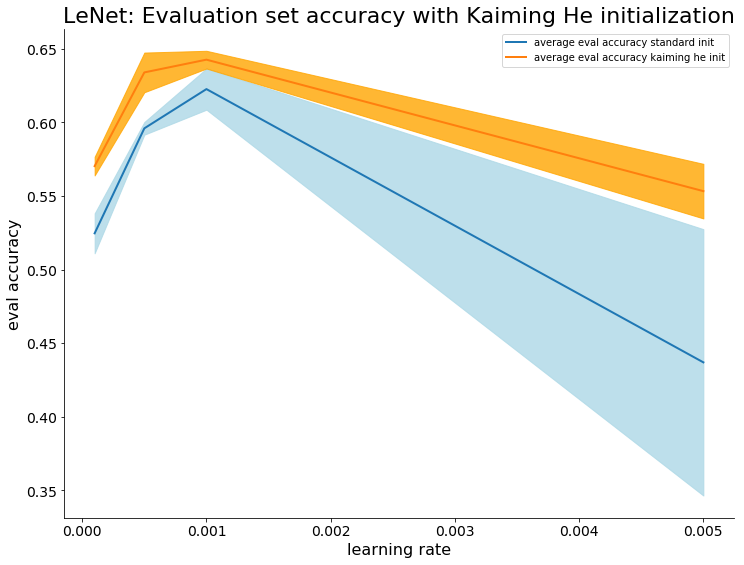

In [74]:
plt.figure(figsize=(12, 9))
 
ax = plt.subplot(111)

# Remove frame lines of the plot
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
 
# show the axis ticks only on the bottom and on the left of the axis
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# make the axis big enough
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
 
plt.ylabel("eval accuracy", fontsize=16)
plt.xlabel("learning rate", fontsize=16)

 
# plt error bars
plt.fill_between(lr[4:8], acc_avg[4:8] - acc_err[4:8],
                acc_avg[4:8] + acc_err[4:8], color="lightblue",alpha=0.8)
 
plt.plot(lr[4:8], acc_avg[4:8], lw=2, label="average eval accuracy standard init")


plt.fill_between(kai_lr, kai_acc_avg - kai_acc_err,
                kai_acc_avg + kai_acc_err, color="orange",alpha=0.8)
 
plt.plot(kai_lr, kai_acc_avg, lw=2, label="average eval accuracy kaiming he init")


plt.legend(loc='best')
 
plt.title("LeNet: Evaluation set accuracy with Kaiming He initialization", fontsize=22)
 
plt.savefig("lenet_eval_acc_kaiming_init_wd_0", bbox_inches="tight")

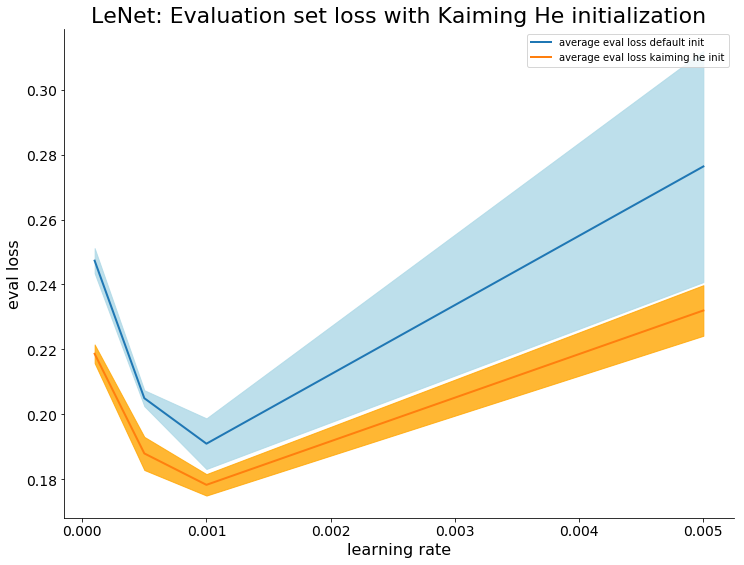

In [73]:
plt.figure(figsize=(12, 9))
 
ax = plt.subplot(111)

# Remove frame lines of the plot
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
 
# show the axis ticks only on the bottom and on the left of the axis
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# make the axis big enough
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
 
plt.ylabel("eval loss", fontsize=16)
plt.xlabel("learning rate", fontsize=16)

 
# plt error bars
plt.fill_between(lr[4:8], loss_avg[4:8] - loss_err[4:8],
                loss_avg[4:8] + loss_err[4:8], color="lightblue",alpha=0.8)
 
plt.plot(lr[4:8], loss_avg[4:8], lw=2, label="average eval loss default init")

plt.fill_between(kai_lr, kai_loss_avg - kai_loss_err,
                kai_loss_avg + kai_loss_err, color="orange",alpha=0.8)
 
plt.plot(kai_lr, kai_loss_avg, lw=2, label="average eval loss kaiming he init")




plt.legend(loc='best')
 
plt.title("LeNet: Evaluation set loss with Kaiming He initialization", fontsize=22)
 
plt.savefig("lenet_eval_loss_kaiming_init_wd_0", bbox_inches="tight")